In [66]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [67]:
#Reading Data
ev_path = 'Resources/Clean_EV_Data.csv'
ev_df = pd.read_csv(ev_path)
census_path = 'Resources/2022_census'
cen_df = pd.read_csv(census_path)
population_file_path = 'Resources/zipcode_population.csv'
population_df = pd.read_csv(population_file_path)
charging_station_file_path = 'Resources/charging_stations(2022).csv'
cs_df = pd.read_csv(charging_station_file_path)

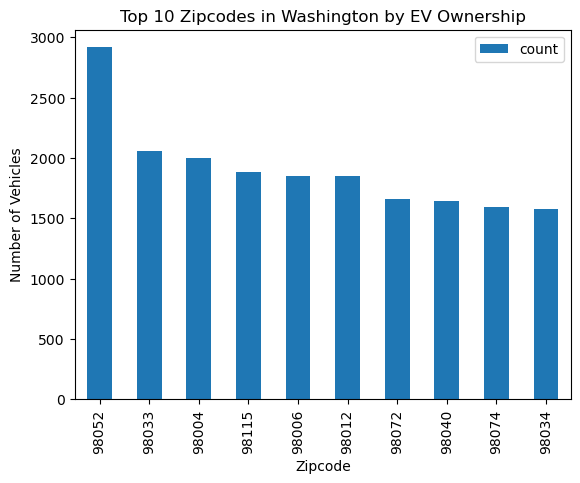

In [68]:
#Ownership by zipcode
zip_count = ev_df['Postal Code'].value_counts()
zip_count_df = pd.DataFrame(zip_count)

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
zip_df = zip_count_df.nlargest(10,columns=['count'])
zip_df

zip_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

plt.show()

In [69]:
# get population and zipcode separated from df
pop_df = cen_df[['WA Zipcode', 'Population']]
sorted_pop = pop_df.sort_values(by='Population', ascending=False)
top_pop_df = sorted_pop.head(10)
# get income and zipcode separated from df
income_df = cen_df[['WA Zipcode', 'Median Household Income']]
sorted_income = income_df.sort_values(by='Median Household Income', ascending=False)
top_income_df = sorted_income.head(10)
#get per capita and zipcode separted from df
pc_df = cen_df[['WA Zipcode','Income Per Capita']]

In [70]:
# run some linear regression to show if population affects EV ownership
# merge census and EV data in order to compute regression and relationships
cen_df = cen_df.rename(columns={'WA Zipcode':'Postal Code'})
ev_cen = cen_df.merge(ev_df, on='Postal Code').reset_index()
# clean dataframe to include only the columns we are working with
clean_merged_df = ev_cen[['Census Year',
                          'Postal Code',
                          'Population',
                          'Median Household Income',
                          'Income Per Capita',
#                           'County',
                          'Make',
                          'Model',
                          'Electric Vehicle Type']]
clean_merged_df

,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,Make,Model,Electric Vehicle Type
0,2022,98901,33106,55536,25237.0,NISSAN,LEAF,Battery Electric Vehicle (BEV)
1,2022,98901,33106,55536,25237.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
2,2022,98901,33106,55536,25237.0,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV)
3,2022,98901,33106,55536,25237.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
4,2022,98901,33106,55536,25237.0,MERCEDES-BENZ,B-CLASS,Battery Electric Vehicle (BEV)
...,...,...,...,...,...,...,...,...
112241,2022,99131,122,34081,31798.0,NISSAN,LEAF,Battery Electric Vehicle (BEV)
112242,2022,99348,1590,74211,32056.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV)
112243,2022,98336,594,76250,30549.0,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV)
112244,2022,98935,4378,60085,18814.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)


In [71]:
ev_count = clean_merged_df.groupby('Postal Code').count()
type_count = ev_count[['Electric Vehicle Type']]
type_count = type_count.reset_index()

In [72]:
# population = clean_merged_df['Population'].unique()
# for each pop in population:
df = clean_merged_df[['Postal Code','Population']]
df_per_cap = df.drop_duplicates()

In [73]:
merged_percapita = pd.merge(df_per_cap, type_count, on='Postal Code', how='outer')
merged_percapita

,Postal Code,Population,Electric Vehicle Type
0,98901,33106,69
1,98237,4979,21
2,98201,30587,250
3,98021,34993,1156
4,98203,36448,344
...,...,...,...
491,99131,122,1
492,99348,1590,1
493,98336,594,1
494,98935,4378,1


In [74]:
merged_percapita['EV Population Percent'] = (merged_percapita['Electric Vehicle Type']/merged_percapita['Population'])*100
merged_percapita = merged_percapita.rename(columns = {'Electric Vehicle Type':'Electric Vehicle Count'})

In [75]:
merged_percapita.sort_values(by='EV Population Percent', ascending=False)

,Postal Code,Population,Electric Vehicle Count,EV Population Percent
344,98134,852,158,18.544601
451,98833,153,14,9.150327
153,98039,2923,242,8.279165
441,98286,158,11,6.962025
124,98072,25034,1661,6.634976
...,...,...,...,...
492,99348,1590,1,0.062893
437,98952,1724,1,0.058005
411,98857,3545,2,0.056417
403,98951,13145,5,0.038037


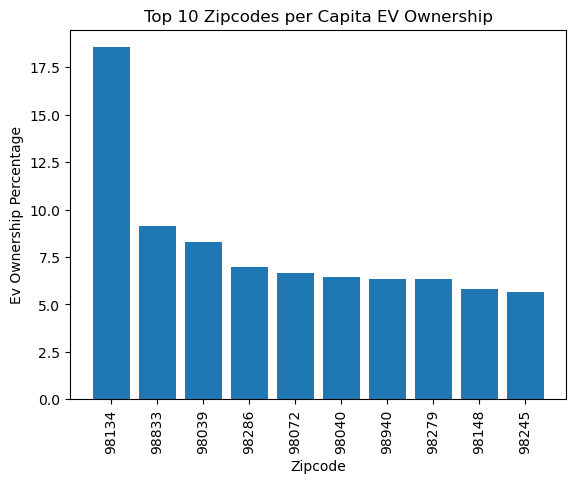

In [76]:
merged_percapita_top10 = merged_percapita.nlargest(10,columns='EV Population Percent')

x_axis_list = np.arange(len(merged_percapita_top10['Postal Code']))
x_ticks = [value for value in x_axis_list]
y_axis = merged_percapita_top10['EV Population Percent']
plt.title('Top 10 Zipcodes per Capita EV Ownership')
plt.xlabel('Zipcode')
plt.ylabel('Ev Ownership Percentage')
plt.xticks(x_ticks, merged_percapita_top10['Postal Code'], rotation='vertical')
plt.bar(x_axis_list, y_axis)
plt.show()

In [77]:
clean_ev_cen = ev_cen.groupby('Make').agg({'Income Per Capita':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_ev_cen.columns = clean_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_ev_cen_filtered = clean_ev_cen[clean_ev_cen['Postal Code_<lambda>']>10]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_ev_cen_filtered.shape)
# clean_ev_cen_filtered.sort_values('Income Per Capita_median')

(34, 4)
(31, 4)


In [78]:
ev_sum = clean_ev_cen_filtered['Postal Code_<lambda>'].sum()
clean_ev_cen_filtered['Make Percent'] = (clean_ev_cen_filtered['Postal Code_<lambda>']/ev_sum)*100
clean_ev_cen_filtered = clean_ev_cen_filtered.sort_values(by='Make Percent')
clean_ev_cen_filtered.head()

/var/folders/py/7cp6kly918j0pj88vzyh535m0000gn/T/ipykernel_80352/1721433677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ev_cen_filtered['Make Percent'] = (clean_ev_cen_filtered['Postal Code_<lambda>']/ev_sum)*100


,Make_,Income Per Capita_median,Income Per Capita_mean,Postal Code_<lambda>,Make Percent
10,GENESIS,62999.0,63760.611111,15,0.230097
8,FISKER,52800.0,61512.736842,18,0.276116
17,LEXUS,56311.0,64853.969697,28,0.429514
16,LAND ROVER,75493.5,72068.052632,32,0.490873
28,SUBARU,60001.0,61104.016949,46,0.705630


In [79]:
type_slp, type_int, type_r, type_p, type_stderr = stats.linregress(clean_ev_cen_filtered['Income Per Capita_median'],
                                                                  clean_ev_cen_filtered['Make Percent'])

Text(0.5, 0, 'Median Per Capita Income')

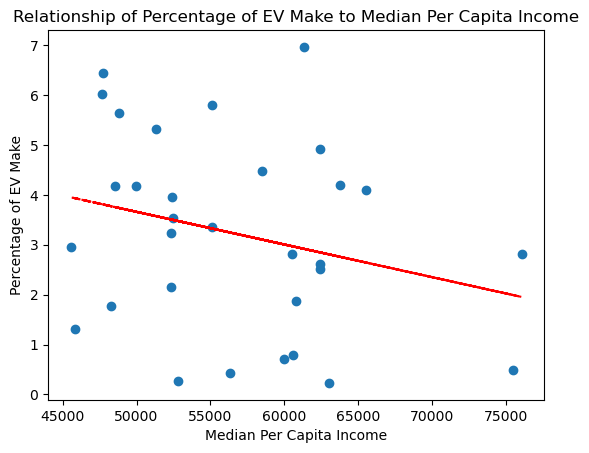

In [80]:
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,6)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))


plt.scatter(clean_ev_cen_filtered['Income Per Capita_median'], clean_ev_cen_filtered['Make Percent'])
type_line = type_slp * clean_ev_cen_filtered['Income Per Capita_median'] + type_int
plt.plot(clean_ev_cen_filtered['Income Per Capita_median'],type_line,'--',color='r')
plt.title('Relationship of Percentage of EV Make to Median Per Capita Income')
plt.ylabel('Percentage of EV Make')
plt.xlabel('Median Per Capita Income')

<BarContainer object of 31 artists>

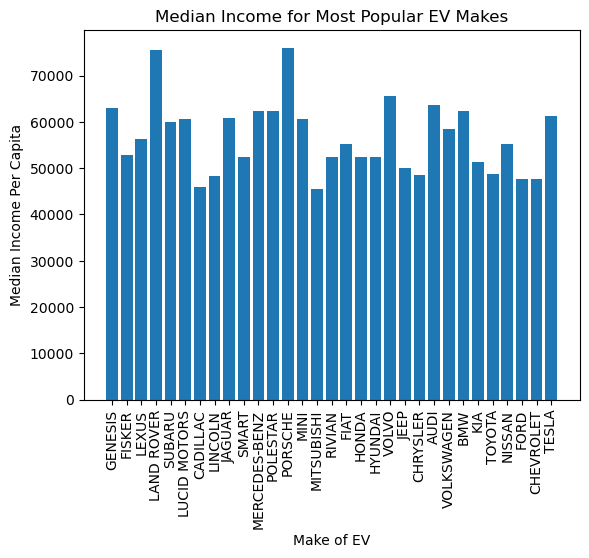

In [81]:
x_axis_list = np.arange(len(clean_ev_cen_filtered['Make_']))
x_ticks = [value for value in x_axis_list]
plt.title('Median Income for Most Popular EV Makes')
plt.xlabel('Make of EV')
plt.ylabel('Median Income Per Capita')
plt.xticks(x_ticks, clean_ev_cen_filtered['Make_'], rotation='vertical')
plt.bar(clean_ev_cen_filtered['Make_'], clean_ev_cen_filtered['Income Per Capita_median'])


In [82]:
# x_axis_list = np.arange(len(clean_ev_cen_filtered['Make_']))
# x_ticks = [value for value in x_axis_list]
# plt.xticks(x_ticks, clean_ev_cen_filtered['Make_'], rotation='vertical')
# plt.bar(clean_ev_cen_filtered['Make_'], clean_ev_cen_filtered['Postal Code_<lambda>'])

In [83]:
clean_type_ev_cen = ev_cen.groupby(['Make','Electric Vehicle Type']).agg({'Income Per Capita':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_type_ev_cen.columns = clean_type_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_type_ev_cen_filtered = clean_type_ev_cen[clean_type_ev_cen['Postal Code_<lambda>']>50]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_type_ev_cen_filtered.shape)
clean_type_ev_cen_filtered
clean_type_ev_cen_filtered

(34, 4)
(38, 5)


,Make_,Electric Vehicle Type_,Income Per Capita_median,Income Per Capita_mean,Postal Code_<lambda>
0,AUDI,Battery Electric Vehicle (BEV),63748.0,69694.487979,224
1,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),63748.0,69177.295681,233
4,BMW,Battery Electric Vehicle (BEV),67017.0,70668.909091,182
5,BMW,Plug-in Hybrid Electric Vehicle (PHEV),61597.0,66961.024993,314
6,CADILLAC,Plug-in Hybrid Electric Vehicle (PHEV),45845.5,52690.898148,85
7,CHEVROLET,Battery Electric Vehicle (BEV),50946.0,56513.980099,373
8,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),46719.0,53021.017846,383
9,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),48511.0,56453.499156,272
10,FIAT,Battery Electric Vehicle (BEV),55109.0,60309.051157,219
12,FORD,Battery Electric Vehicle (BEV),50901.0,56194.751848,315


In [84]:
ev_count = clean_merged_df.groupby('Postal Code').count()
type_count = ev_count[['Electric Vehicle Type']]
type_count = type_count.reset_index()

In [85]:
df = clean_merged_df[['Postal Code','Population']]
df_per_cap = df.drop_duplicates()

In [86]:
merged_percapita = pd.merge(df_per_cap, type_count, on='Postal Code', how='outer')
merged_percapita

,Postal Code,Population,Electric Vehicle Type
0,98901,33106,69
1,98237,4979,21
2,98201,30587,250
3,98021,34993,1156
4,98203,36448,344
...,...,...,...
491,99131,122,1
492,99348,1590,1
493,98336,594,1
494,98935,4378,1


In [87]:
merged_percapita['EV Population Percent'] = (merged_percapita['Electric Vehicle Type']/merged_percapita['Population'])*100
merged_percapita = merged_percapita.rename(columns = {'Electric Vehicle Type':'Electric Vehicle Count'})

In [88]:
merged_percapita.sort_values(by='EV Population Percent', ascending=False)

,Postal Code,Population,Electric Vehicle Count,EV Population Percent
344,98134,852,158,18.544601
451,98833,153,14,9.150327
153,98039,2923,242,8.279165
441,98286,158,11,6.962025
124,98072,25034,1661,6.634976
...,...,...,...,...
492,99348,1590,1,0.062893
437,98952,1724,1,0.058005
411,98857,3545,2,0.056417
403,98951,13145,5,0.038037


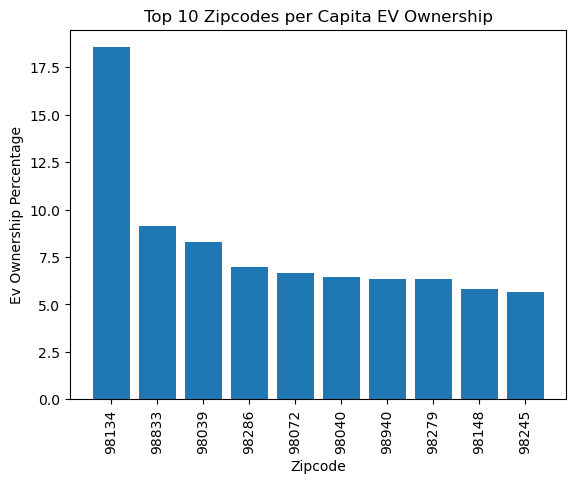

In [89]:
#graph top ten zip codes 
merged_percapita_top10 = merged_percapita.nlargest(10,columns='EV Population Percent')

x_axis_list = np.arange(len(merged_percapita_top10['Postal Code']))
x_ticks = [value for value in x_axis_list]
y_axis = merged_percapita_top10['EV Population Percent']
plt.title('Top 10 Zipcodes per Capita EV Ownership')
plt.xlabel('Zipcode')
plt.ylabel('Ev Ownership Percentage')
plt.xticks(x_ticks, merged_percapita_top10['Postal Code'], rotation='vertical')
plt.bar(x_axis_list, y_axis)
plt.savefig('Graphs/top10-EVownership',bbox_inches='tight')
plt.show()

In [90]:
clean_ev_cen = ev_cen.groupby('Make').agg({'Income Per Capita':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_ev_cen.columns = clean_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_ev_cen_filtered = clean_ev_cen[clean_ev_cen['Postal Code_<lambda>']>10]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_ev_cen_filtered.shape)
# clean_ev_cen_filtered.sort_values('Income Per Capita_median')

(34, 4)
(31, 4)


In [91]:
ev_sum = clean_ev_cen_filtered['Postal Code_<lambda>'].sum()
clean_ev_cen_filtered['Make Percent'] = (clean_ev_cen_filtered['Postal Code_<lambda>']/ev_sum)*100
clean_ev_cen_filtered = clean_ev_cen_filtered.sort_values(by='Make Percent')
clean_ev_cen_filtered.head()

/var/folders/py/7cp6kly918j0pj88vzyh535m0000gn/T/ipykernel_80352/1721433677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ev_cen_filtered['Make Percent'] = (clean_ev_cen_filtered['Postal Code_<lambda>']/ev_sum)*100


,Make_,Income Per Capita_median,Income Per Capita_mean,Postal Code_<lambda>,Make Percent
10,GENESIS,62999.0,63760.611111,15,0.230097
8,FISKER,52800.0,61512.736842,18,0.276116
17,LEXUS,56311.0,64853.969697,28,0.429514
16,LAND ROVER,75493.5,72068.052632,32,0.490873
28,SUBARU,60001.0,61104.016949,46,0.705630


In [92]:
type_slp, type_int, type_r, type_p, type_stderr = stats.linregress(clean_ev_cen_filtered['Income Per Capita_median'],
                                                                  clean_ev_cen_filtered['Make Percent'])

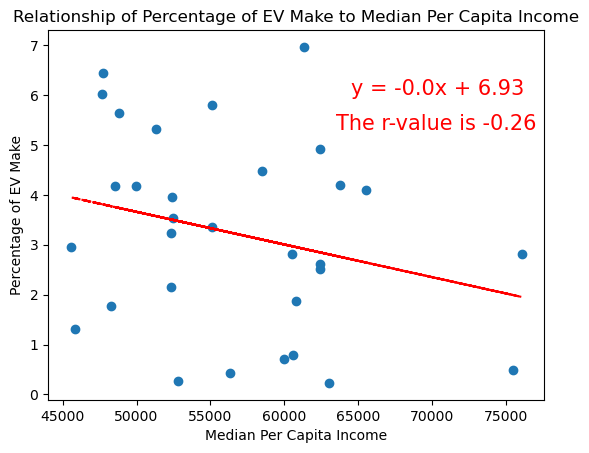

In [93]:
x_values = clean_ev_cen_filtered['Income Per Capita_median']
y_values = clean_ev_cen_filtered['Make Percent']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(clean_ev_cen_filtered['Income Per Capita_median'], clean_ev_cen_filtered['Make Percent'])
type_line = type_slp * clean_ev_cen_filtered['Income Per Capita_median'] + type_int
plt.plot(clean_ev_cen_filtered['Income Per Capita_median'],type_line,'--',color='r')
plt.annotate(line_eq,(64500,6), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(63500,5.3), fontsize=15, color='red')
plt.title('Relationship of Percentage of EV Make to Median Per Capita Income')
plt.ylabel('Percentage of EV Make')
plt.xlabel('Median Per Capita Income')
plt.savefig('Graphs/EV-make-pc-Income-line')


In [94]:
clean_ev_cen_filtered = clean_ev_cen_filtered.sort_values(by='Income Per Capita_median')

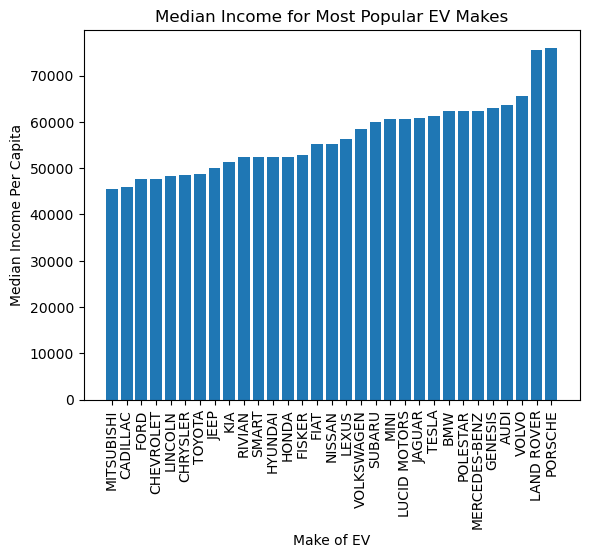

In [95]:
x_axis_list = np.arange(len(clean_ev_cen_filtered['Make_']))
x_ticks = [value for value in x_axis_list]
plt.title('Median Income for Most Popular EV Makes')
plt.xlabel('Make of EV')
plt.ylabel('Median Income Per Capita')
plt.xticks(x_ticks, clean_ev_cen_filtered['Make_'], rotation='vertical')
plt.bar(clean_ev_cen_filtered['Make_'], clean_ev_cen_filtered['Income Per Capita_median'])
plt.savefig('Graphs/income_make_bar',bbox_inches='tight')

In [96]:
clean_type_ev_cen = ev_cen.groupby(['Make','Electric Vehicle Type']).agg({'Income Per Capita':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_type_ev_cen.columns = clean_type_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_type_ev_cen_filtered = clean_type_ev_cen[clean_type_ev_cen['Postal Code_<lambda>']>50]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_type_ev_cen_filtered.shape)
clean_type_ev_cen_filtered
clean_type_ev_cen_filtered

(34, 4)
(38, 5)


,Make_,Electric Vehicle Type_,Income Per Capita_median,Income Per Capita_mean,Postal Code_<lambda>
0,AUDI,Battery Electric Vehicle (BEV),63748.0,69694.487979,224
1,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),63748.0,69177.295681,233
4,BMW,Battery Electric Vehicle (BEV),67017.0,70668.909091,182
5,BMW,Plug-in Hybrid Electric Vehicle (PHEV),61597.0,66961.024993,314
6,CADILLAC,Plug-in Hybrid Electric Vehicle (PHEV),45845.5,52690.898148,85
7,CHEVROLET,Battery Electric Vehicle (BEV),50946.0,56513.980099,373
8,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),46719.0,53021.017846,383
9,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),48511.0,56453.499156,272
10,FIAT,Battery Electric Vehicle (BEV),55109.0,60309.051157,219
12,FORD,Battery Electric Vehicle (BEV),50901.0,56194.751848,315


In [97]:
# plot box and whisker plot
# set x axis equal to the type of EV
# the boxes will include all of the makes
# set the y axis equal to the income per capita
bev = clean_type_ev_cen_filtered.loc[
    clean_type_ev_cen_filtered['Electric Vehicle Type_']=='Battery Electric Vehicle (BEV)',:]
phev = clean_type_ev_cen_filtered.loc[
    clean_type_ev_cen_filtered['Electric Vehicle Type_']=='Plug-in Hybrid Electric Vehicle (PHEV)',:]

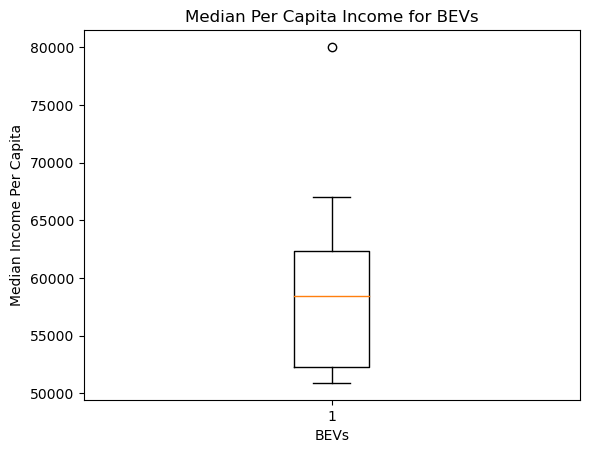

In [98]:
fig1, ax1 = plt.subplots()
ax1.boxplot(bev['Income Per Capita_median'])
ax1.set_title('Median Per Capita Income for BEVs')
ax1.set_ylabel('Median Income Per Capita')
ax1.set_xlabel('BEVs')
plt.savefig('Graphs/BEV-box')
plt.show()

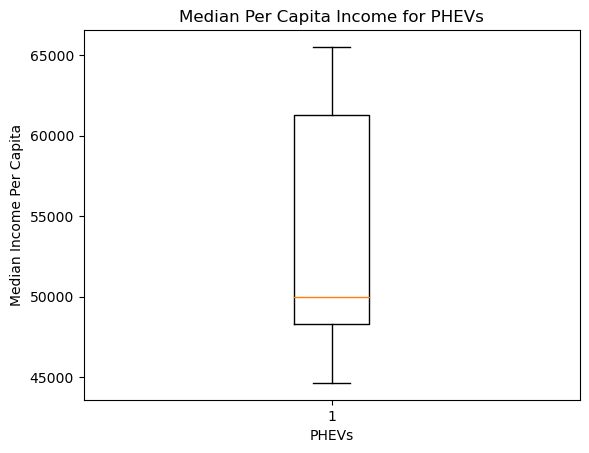

In [99]:
fig2, ax2 = plt.subplots()
ax2.boxplot(phev['Income Per Capita_median'])
ax2.set_title('Median Per Capita Income for PHEVs')
ax2.set_ylabel('Median Income Per Capita')
ax2.set_xlabel('PHEVs')
plt.savefig('Graphs/PHEV-box')
plt.show()

In [100]:
# merge census and EV data in order to compute regression and relationships
cen_df = cen_df.rename(columns={'WA Zipcode':'Postal Code'})
ev_cen = cen_df.merge(ev_df, on='Postal Code').reset_index()
# clean dataframe to include only the columns we are working with
clean_merged_df = ev_cen[['Census Year',
                          'Postal Code',
                          'Population',
                          'Median Household Income',
                          'Income Per Capita',
#                           'County',
                          'Make',
                          'Model',
                          'Electric Vehicle Type']]
clean_merged_df

clean_merged_df = clean_merged_df[['Postal Code','Income Per Capita']]
income_df = clean_merged_df.drop_duplicates()
income_df

,Postal Code,Income Per Capita
0,98901,25237.0
69,98237,31650.0
90,98201,41730.0
340,98021,67017.0
1496,98203,44288.0
...,...,...
112241,99131,31798.0
112242,99348,32056.0
112243,98336,30549.0
112244,98935,18814.0


In [101]:
#Merging Data Frames
charging_station_by_population_df = pd.merge(cs_df,population_df)
charging_station_by_population_df

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent
0,98052,27,45,77324,2916,3.771145
1,98033,20,77,40425,2059,5.093383
2,98004,116,86,39161,2001,5.109675
3,98115,6,20,54457,1880,3.452265
4,98006,14,115,39753,1852,4.658768
...,...,...,...,...,...,...
491,98263,0,468,178,1,0.561798
492,98326,0,472,1066,1,0.093809
493,98283,2,473,466,1,0.214592
494,98530,0,474,558,1,0.179211


In [102]:
#Calculating Charging Stations per Capita
charging_station_by_population_df['Charging Stations/Capita'] = (charging_station_by_population_df['Number of Charging Stations']/charging_station_by_population_df['Population'])*100

charging_station_by_population_df
charging_station_by_population_df.sort_values(by='Charging Stations/Capita', ascending=False)

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita
479,98164,13,378,239,1,0.418410,5.439331
182,98134,24,344,852,158,18.544601,2.816901
430,98288,3,384,180,3,1.666667,1.666667
469,98575,1,479,134,1,0.746269,0.746269
374,98345,2,37,284,8,2.816901,0.704225
...,...,...,...,...,...,...,...
327,98828,0,365,2075,18,0.867470,0.000000
328,98925,0,407,533,17,3.189493,0.000000
331,99036,0,332,1546,16,1.034929,0.000000
332,98635,0,413,1975,16,0.810127,0.000000


In [103]:
#Merging with Income Data
merged_income_df = pd.merge(charging_station_by_population_df,income_df,on='Postal Code',how='outer')
merged_income_df
#Removing Outliers
merged_income_df_filtered = merged_income_df[merged_income_df['Charging Stations/Capita']<1.5]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Population Percent']<15]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Income Per Capita']<200000]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Number of Charging Stations']<100]

merged_income_df_filtered

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita,Income Per Capita
0,98052,27,45,77324,2916,3.771145,0.034918,82929.0
1,98033,20,77,40425,2059,5.093383,0.049474,102001.0
3,98115,6,20,54457,1880,3.452265,0.011018,80879.0
4,98006,14,115,39753,1852,4.658768,0.035217,84234.0
5,98012,2,106,75555,1850,2.448547,0.002647,58143.0
...,...,...,...,...,...,...,...,...
491,98263,0,468,178,1,0.561798,0.000000,38803.0
492,98326,0,472,1066,1,0.093809,0.000000,23750.0
493,98283,2,473,466,1,0.214592,0.429185,21288.0
494,98530,0,474,558,1,0.179211,0.000000,21641.0


The r-value is 0.74


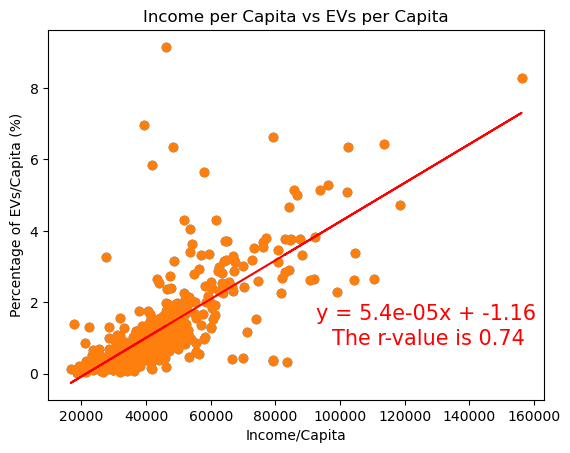

In [104]:
#Scatterplot - Income per Capita vs EVs by Capita
plt.scatter(merged_income_df_filtered['Income Per Capita'],
            merged_income_df_filtered['Population Percent'])

x_values = merged_income_df_filtered['Income Per Capita']
y_values = merged_income_df_filtered['Population Percent']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,6)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(92500,1.5), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(97500,0.8), fontsize=15, color='red')
plt.title("Income per Capita vs EVs per Capita")
plt.xlabel('Income/Capita')
plt.ylabel('Percentage of EVs/Capita (%)')
print(f'The r-value is {rvalue}')

plt.savefig('Graphs/scatter_income_vs_ev.png')

In [105]:
#Top 10 Richest Zipcodes
#Filtering to top 10 Income Per Capita
richest_df_filtered = merged_income_df_filtered.nlargest(10,columns=['Income Per Capita'])
richest_df_filtered

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita,Income Per Capita
138,98039,0,153,2923,242,8.279165,0.000000,156124.0
19,98112,3,65,23456,1110,4.732265,0.012790,118391.0
7,98040,11,60,25464,1639,6.436538,0.043198,113575.0
64,98121,99,112,20562,545,2.650520,0.481471,110372.0
20,98109,82,134,32251,1089,3.376639,0.254256,104635.0
84,98101,45,97,16302,428,2.625445,0.276040,104261.0
307,98940,0,308,409,26,6.356968,0.000000,102459.0
1,98033,20,77,40425,2059,5.093383,0.049474,102001.0
60,98102,8,54,25827,594,2.299919,0.030975,99103.0
11,98075,5,59,25202,1330,5.277359,0.019840,96356.0


In [106]:
#Top 10 Charging Stations per Capita
#Filtering by highest percentage of charging stations per capita in a zipcode
charging_df_filtered = merged_income_df_filtered.nlargest(10,columns=['Charging Stations/Capita'])
charging_df_filtered

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita,Income Per Capita
469,98575,1,479,134,1,0.746269,0.746269,34128.0
374,98345,2,37,284,8,2.816901,0.704225,63531.0
346,98833,1,451,153,14,9.150327,0.653595,46305.0
64,98121,99,112,20562,545,2.650520,0.481471,110372.0
392,98304,4,421,925,6,0.648649,0.432432,34367.0
493,98283,2,473,466,1,0.214592,0.429185,21288.0
351,98068,2,358,528,13,2.462121,0.378788,63853.0
448,98314,5,456,1565,2,0.127796,0.319489,30452.0
58,98104,47,165,15052,609,4.045974,0.312251,53546.0
84,98101,45,97,16302,428,2.625445,0.276040,104261.0


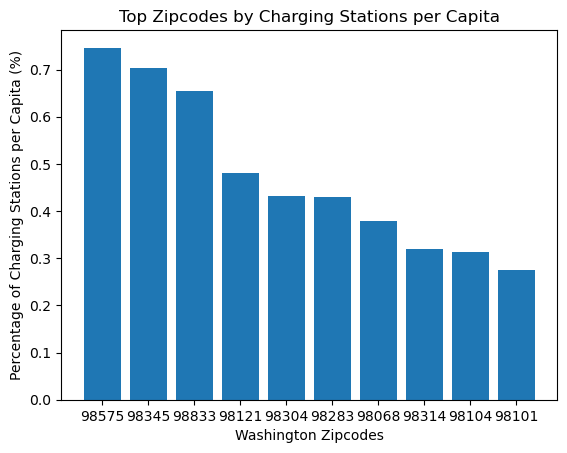

In [107]:
#Highest Percentage of Charging Stations per Capita Bar Graph
high_percent_zipcodes_x = ['98575','98345','98833','98121','98304',
                   '98283','98068','98314','98104','98101']
top_population_percent_y = [0.746269,0.704225,0.653595,0.481471,0.432432,
                        0.429185,0.378788,0.319489,0.312251,0.276040]

plt.bar(high_percent_zipcodes_x,top_population_percent_y)
plt.title("Top Zipcodes by Charging Stations per Capita")
plt.xlabel('Washington Zipcodes')
plt.ylabel('Percentage of Charging Stations per Capita (%)')

plt.savefig('Graphs/bar_top_charging_stations.png')

plt.show()

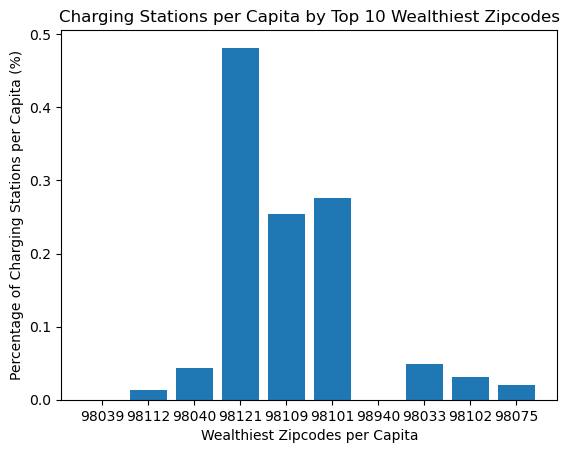

In [108]:
#Richest Zipcodes - Charging Stations Bar Graph
rich_zipcodes_x = ['98039','98112','98040','98121','98109',
                   '98101','98940','98033','98102','98075']
rich_charging_per_capita_y = [0.000000,0.012790,0.043198,0.481471,0.254256,
                        0.276040,0.000000,0.049474,0.030975,0.019840]

plt.bar(rich_zipcodes_x,rich_charging_per_capita_y)
plt.title("Charging Stations per Capita by Top 10 Wealthiest Zipcodes")
plt.xlabel('Wealthiest Zipcodes per Capita')
plt.ylabel('Percentage of Charging Stations per Capita (%)')

plt.savefig('Graphs/bar_wealthy_charging_stations.png')

plt.show()

The r-value is 0.12


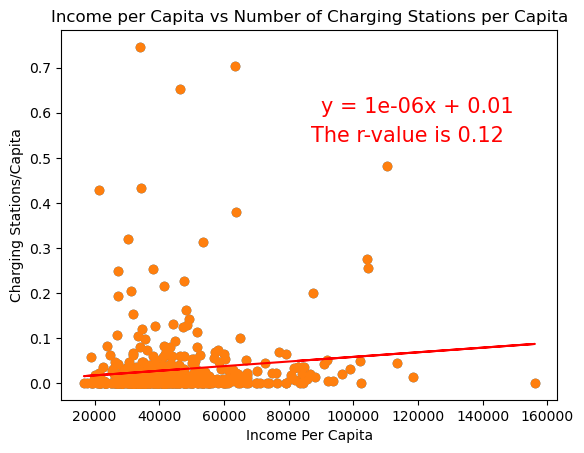

In [109]:
#Scatterplot - Charging Stations per Capita vs Income per Capita
plt.scatter(merged_income_df_filtered['Income Per Capita'],
            merged_income_df_filtered['Charging Stations/Capita'])

x_values = merged_income_df_filtered['Income Per Capita']
y_values = merged_income_df_filtered['Charging Stations/Capita']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,6)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(90000,0.6), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(87000,0.535), fontsize=15, color='red')
plt.title("Income per Capita vs Number of Charging Stations per Capita")
plt.xlabel('Income Per Capita')
plt.ylabel('Charging Stations/Capita')
print(f'The r-value is {rvalue}')
plt.savefig('Graphs/scatter_income_charging_stations.png')